# <center>Our analysis of my Vivino</center>

**Disclaimer: <font color="red">Use of this code for web scraping may not be current or applicable due to potential changes in the website's structure and policies. The data extracted is for educational purposes only and should not be used for any unauthorized or malicious activities. Always respect website terms of service and consider seeking permission from the site owner before scraping. The author of this code assumes no responsibility for any misuse or legal consequences arising from its use.</font>**

**Note:** Before attempting any web scraping, it is recommended to review the website's terms of service and privacy policy, and to seek proper authorization if required.

**Data Note:** Please be aware that the data obtained reflects a specific period when the wine from the site was available for purchase through Vivino. It may not represent current availability or prices, and accuracy is not guaranteed.


# Introduction :

**My Vivino is an online marketplace with a rich wine database and a user base of 27 million, primarily located in North America. Our primary offering is a wine recommendation system, which has been operating on a rules-based framework. However, it's becoming somewhat outdated. In an industry where data science is rapidly shaping the future, we've recognized the need to evolve and stay competitive, especially with the substantial investments made by our competitor, my_wine.com.**

**In response to the changing landscape, our CEO has made the strategic decision to allocate a budget for a data science project that you've proposed. This project aims to revolutionize our wine recommendation system and provide a more data-driven and personalized experience for our users.**

**<font color="blue"><center>So, in this exciting trip into Vivino data website if will detail almost each step and if you want you can go directly in part 2.</center>**

# <center>Part 1 : DATA COLLECTION AND CLEANSET</center>


### In this first part we scrap the data with selenium, because the website use the javascript stack and it's use an infinite scroll, so beautifulsoup is better to scrap static website, after multiply reseach we can see than to scrap these informations we need to structure the step to get them, and we choose to follow the path with the price bar but we have an issue with USA location, the gap between the price is to high to load and get information and you will see how we deal with...

In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [1]:
import csv
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')

### Here is the different options we used to start the webdriver, i used two URLs to enter in the page which in we need because if we use directly the second URL you will go in your own localisation like if you are in canada the website return in canada, and in our project we want specificaly in france.
### Basically we can not scrap scrap more than 550 line in less five minutes and over that it will take at least 1 hours, that why we haven't choose the USA location 

In [64]:
"""chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('-headless')
chrome_options.add_argument('-no-sandvox')
chrome_options.add_argument('-disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)
url = "https://www.vivino.com/FR/en/"
url1= "https://www.vivino.com/explore?e=eJwNyjsOgCAQBcDbbI2F5YuVHoDE2sCyGKJ8Amj09jr1TPxi0cSYV027x21qkG5OihUDZfvCSutbCXw0ytXBSWOK5sGoFMWQoKj880pOfEjiIOkDvgkcug"
cookie = 'body > div.fc-consent-root > div.fc-dialog-container > div.fc-dialog.fc-choice-dialog > div.fc-choice-dialog-header > button'
driver.get(url)
wait = WebDriverWait(driver, 10)
cookie_click = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, cookie)))
cookie_click = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, cookie)))
cookie_click.click()
driver.get(url1)"""

<selenium.webdriver.chrome.webdriver.WebDriver (session="3c2fc8957f743b7e73a498b825d51ac9")>

### We make differents function to imitate a personn who enter into the website and scroll different product, and each functions are well describe yet.

In [3]:
def process():
    #icone_discount = '//*[@id="explore-page-app"]/div/div/div[2]/div[1]/div/label/span[1]/span/input'
    #icone_discount_input = driver.find_element(By.XPATH, icone_discount)
    #icone_discount_input.click()
    #time.sleep(1)
    sort_button = '#explore-page-app > div > div > div.explorerPage__filtersAndSort--1TqkY > div.MuiInputBase-root.MuiInput-root > div'
    sort_button_click = driver.find_element(By.CSS_SELECTOR, sort_button)
    sort_button_click.click()
    time.sleep(1)
    lowest_price_first = '//*[@id="menu-"]/div[3]/ul/li[5]'
    lowest_price_first_click = driver.find_element(By.XPATH, lowest_price_first)
    lowest_price_first_click.click()

In [65]:
"""red = '//*[@id="explore-page-app"]/div/div/div[2]/div[1]/div/div[1]/div[2]/label[1]'
white = '//*[@id="explore-page-app"]/div/div/div[2]/div[1]/div/div[1]/div[2]/label[2]'
sparkling = '//*[@id="explore-page-app"]/div/div/div[2]/div[1]/div/div[1]/div[2]/label[3]'
rose = '//*[@id="explore-page-app"]/div/div/div[2]/div[1]/div/div[1]/div[2]/label[4]'
def wine(Type):
    wine_click = driver.find_element(By.XPATH, Type) #red, white, sparkling, rose
    wine_click.click()
    time.sleep(1)
    process()"""

In [5]:
def scroll_up():
    current_scroll_position = driver.execute_script("return window.scrollY;")
    if current_scroll_position > 100:
        driver.execute_script("window.scrollBy(0, -800);")

In [6]:
def scroll_at_goal(x):
    while True:
        try:
            price_elements = driver.find_elements(By.CLASS_NAME, "addToCartButton__price--qJdh4")
            found = False
            
            for price in price_elements:
                price_text = price.text
                if "€" in price_text:
                    price_value = float(price_text.replace("€", "").replace("\n", ""))
                    if price_value >= x:
                        found = True
                        break
            
            if found:
                break
            else:
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(2)
                scroll_up()
                time.sleep(2)
        except StaleElementReferenceException:
            continue

In [7]:
def load_save():    
    
    name_elements = driver.find_elements(By.CLASS_NAME, "wineInfoVintage__truncate--3QAtw")
    price_elements = driver.find_elements(By.CLASS_NAME, "addToCartButton__price--qJdh4")
    av_rating_elements = driver.find_elements(By.CLASS_NAME, "vivinoRating_averageValue__uDdPM")
    nu_rate_elements = driver.find_elements(By.CLASS_NAME, "vivinoRating_caption__xL84P")
    location_elements = driver.find_elements(By.CLASS_NAME, "wineInfoLocation__regionAndCountry--1nEJz")

    name_domain = []
    product_name = []

    for i in range(0, len(name_elements), 2):
        name_domain.append(name_elements[i].text)

    for j in range(1, len(name_elements), 2):
        product_name.append(name_elements[j].text)

    result = []

    for i in range(len(price_elements)):
        data = {}
        data['Name_domain'] = name_domain[i]
        data['Product_name'] = product_name[i]
        data['Location'] = location_elements[i].text
        data['Average_rating'] = av_rating_elements[i].text
        data['Number_of_rates'] = nu_rate_elements[i].text
        data['Price'] = price_elements[i].text
        result.append(data)

    df = pd.DataFrame(result, columns=['Name_domain', 'Product_name', 'Location', 'Average_rating', 'Number_of_rates', 'Price'])
    df.to_csv(f'{file_counter}vivino{"""wine(Type)"""}.csv', index=False)

In [8]:
def refreshing_page():
    driver.refresh()
    driver.execute_script("window.localStorage.clear();")
    driver.execute_script("window.sessionStorage.clear();")
    time.sleep(2)
    driver.execute_script("window.scrollBy(0, -50000);")
    wait = WebDriverWait(driver, 10)
    
    try:
        cookie_click = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, cookie)))
        cookie_click = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, cookie)))
        cookie_click.click()
    except:
        pass
    process()

In [9]:
def price_range_auto(x):
    slider_price_to_0 = driver.find_element(By.CLASS_NAME, "rc-slider-handle-1")
    initial_value = "€0"
    target_value = f"€{x}"
    max_value = "€500"
    
    actions = ActionChains(driver)

    while initial_value != target_value:
        actions.click_and_hold(slider_price_to_0)
        actions.move_by_offset(1, 0).perform()
        #time.sleep(0.1)
        if initial_value == max_value:
            break
            
        current_value_element = driver.find_element(By.CLASS_NAME, "rangeSlider__label--3YvCb.rangeSlider__left--2bp0z")
        initial_value = current_value_element.text

    actions.release().perform()

### Here we call each fucntions with differents boucle for each gap of prices to be save, as i said on the top we can not load more than 500 items in the screen and it will have freeze issue.

In [67]:
"""file_counter = 1

for x in range(9, 31):
    print(f"scroll start {x}")
    scroll_at_goal(x)
    print(f"scroll end {x}")
    time.sleep(1)
    print(f"saving... {x}")
    load_save()
    print(f"saved {x}")
    refreshing_page()
    print("refreshed")
    time.sleep(1)
    price_range_auto(x)
    print(f"df until ${x} and file done{file_counter}")
    file_counter += 1

for x in range(35, 51, 5):
    print(f"scroll start {x}")
    scroll_at_goal(x)
    print(f"scroll end {x}")
    time.sleep(1)
    print(f"saving... {x}")
    load_save()
    print(f"saved {x}")
    refreshing_page()
    print("refreshed")
    time.sleep(1)
    price_range_auto(x)
    print(f"df until ${x} and file done{file_counter}")
    file_counter += 1

for x in range(60, 251, 10):
    print(f"scroll start {x}")
    scroll_at_goal(x)
    print(f"scroll end {x}")
    time.sleep(1)
    print(f"saving... {x}")
    load_save()
    print(f"saved {x}")
    refreshing_page()
    print("refreshed")
    time.sleep(1)
    price_range_auto(x)
    print(f"df until ${x} and file done{file_counter}")
    file_counter += 1
    
for x in range(250, 351, 50):
    print(f"scroll start {x}")
    scroll_at_goal(x)
    print(f"scroll end {x}")
    time.sleep(1)
    print(f"saving... {x}")
    load_save()
    print(f"saved {x}")
    refreshing_page()
    print("refreshed")
    time.sleep(1)
    price_range_auto(x)
    print(f"df until ${x} and file done{file_counter}")
    file_counter += 1
    
for x in range(400, 501, 100):
    print(f"scroll start {x}")
    scroll_at_goal(x)
    print(f"scroll end {x}")
    time.sleep(1)
    print(f"saving... {x}")
    load_save()
    print(f"saved {x}")
    refreshing_page()
    print("refreshed")
    time.sleep(1)
    price_range_auto(x)
    print(f"df until ${x} and file done{file_counter}")
    file_counter += 1
    break"""

scroll start 9


KeyboardInterrupt: 

In [11]:
def concat_dfs(arg):
    dfs = []
    i = 1
    while True:
        try:
            df = pd.read_csv(f'{i}vivino{arg}.csv')
            dfs.append(df)
            i += 1
        except FileNotFoundError:
            break

    df = pd.concat(dfs, axis=0)
    df.drop_duplicates(subset=['Product_name', 'Name_domain'], inplace=True)
    df['Type'] = arg
    return df

In [12]:
"""df1 = concat_dfs("White")
df2 = concat_dfs("Red")
df3 = concat_dfs("Rose")
df4 = concat_dfs("Sparkling")
alldf = pd.concat([df1, df2, df3, df4])"""

'df1 = concat_dfs("White")\ndf2 = concat_dfs("Red")\ndf3 = concat_dfs("Rose")\ndf4 = concat_dfs("Sparkling")\nalldf = pd.concat([df1, df2, df3, df4])'

### Below we decided to split the location in 2 series : Region and country, maybe that will help to answer some question about the place whose the wine are product the most and keep the date with Product_name together because we have the same name but not the same date and it will distort the data.

In [13]:
def rearrange(df):
    pd.options.display.float_format = '{:.2f}'.format

    df['Number_of_rates'] = df['Number_of_rates'].str.replace(r'[^0-9]', '', regex=True).astype(int)
    df['Price'] = df['Price'].str.replace('€\n', '').astype(float)
    df['Average_rating'] = df['Average_rating'].astype(float)

    df.sort_values(by='Price', inplace=True)

    df[['Region', 'Country']] = df['Location'].str.split(', ', expand=True)
    df.drop(columns=['Location'], inplace=True)
    df.insert(df.columns.get_loc('Product_name') + 1, 'Region', df.pop('Region'))
    df.insert(df.columns.get_loc('Product_name') + 2, 'Country', df.pop('Country'))
    df = df[['Name_domain', 'Product_name', 'Region', 'Country', 'Average_rating', 'Number_of_rates', 'Price', 'Type']]

    return df

In [14]:
"""rearrange(alldf)
alldf.reset_index()
alldf.sort_values(by='Price', inplace=True)
alldf.to_csv("vivinoAllWineExportFrance.csv", index=False)"""

'rearrange(alldf)\nalldf.reset_index()\nalldf.sort_values(by=\'Price\', inplace=True)\nalldf.to_csv("vivinoAllWineExportFrance.csv", index=False)'

# <center>Part 2 : DATA EXPLORATION</center>

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
import pandas as pd

### After to concatenate our dataset and cleaned let's see what that give us !

In [5]:
def load_dataset(filename):
    dataset = pd.read_csv(filename)
    return dataset

df = load_dataset("./archive2/vivinoAllWineExportFrance.csv")

In [6]:
df

,Name_domain,Product_name,Region,Country,Average_rating,Number_of_rates,Price,Type
0,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose
1,Château de Lavagnac,Bordeaux 2015,Bordeaux,France,3.6,75,4.10,Red
2,Château de Millet,Colombard - Ugni Blanc 2022,Côtes de Gascogne,France,3.6,759,4.49,White
3,Camina,Chardonnay - Viura 2021,La Mancha,Spain,3.6,25,4.50,White
4,Vinovalie,Les Blousons Noirs Malbec 2020,Cahors,France,3.6,250,4.50,Red
...,...,...,...,...,...,...,...,...
30013,Bollinger,R.D Extra Brut Champagne (Récemment Dégorgé) 1999,Champagne,France,4.7,172,498.00,Sparkling
30014,Veuve Clicquot,La Grande Dame Brut Rosé Champagne 1998,Champagne,France,4.7,215,498.30,Sparkling
30015,Château Certan de May,Pomerol 1928,Pomerol,France,4.3,4777,499.95,Red
30016,Château Lafite Rothschild,Carruades de Lafite Pauillac 2016,Pauillac,France,4.3,190,500.00,Red


In [7]:
def print_summarize_dataset(dataset):
    print(f"Dataset dimension:\n{dataset.shape}\n")
    print(f"First 10 rows of dataset:\n{dataset.head(10)}\n")
    print(f"Statistical summary:\n{dataset.describe(include='all')}\n")
    print(f"Class Distribution:\n{dataset.groupby('Type').size().sort_values()}\n")
    print(f"Types of each series:")
    dataset.info()

In [8]:
print_summarize_dataset(df)

Dataset dimension:
(30018, 8)

First 10 rows of dataset:
           Name_domain                    Product_name             Region  \
0              Premius              Bordeaux Rosé 2021           Bordeaux   
1  Château de Lavagnac                   Bordeaux 2015           Bordeaux   
2    Château de Millet     Colombard - Ugni Blanc 2022  Côtes de Gascogne   
3               Camina         Chardonnay - Viura 2021          La Mancha   
4            Vinovalie  Les Blousons Noirs Malbec 2020             Cahors   
5    Château de Callac               Graves Rouge 2011             Graves   
6               Camina           Tempranillo Rosé 2018          La Mancha   
7    Duchesse de Berry    Cuvée Prestige Bordeaux 2020           Bordeaux   
8  Domaine du Tariquet  Côtes De Gascogne Classic 2018  Côtes de Gascogne   
9  Château Haut Bernin                   Bordeaux 2015           Bordeaux   

  Country  Average_rating  Number_of_rates  Price   Type  
0  France             3.6           

In [9]:
df[df['Country'].isnull()]

,Name_domain,Product_name,Region,Country,Average_rating,Number_of_rates,Price,Type
3137,NaN,Sans Baratin Bla Bla Bla 2022,",",NaN,3.6,88,11.90,Red
9419,Pietershof,Pinot Blanc - Auxerrois 2019,",",NaN,3.8,31,18.65,White
16101,Kleine Schorre,Blanc + (Pinot Blanc - Auxerrois) 2021,",",NaN,4.0,86,30.55,White
16195,Kleine Schorre,Blanc + (Pinot Blanc - Auxerrois) 2022,",",NaN,3.8,1027,30.96,White
22282,Skepparps Vingard,Grand Prix Solaris Mousserande Brut 2019,",",NaN,3.6,195,59.28,Sparkling


In [10]:
df.dropna(inplace=True)

In [11]:
df

,Name_domain,Product_name,Region,Country,Average_rating,Number_of_rates,Price,Type
0,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose
1,Château de Lavagnac,Bordeaux 2015,Bordeaux,France,3.6,75,4.10,Red
2,Château de Millet,Colombard - Ugni Blanc 2022,Côtes de Gascogne,France,3.6,759,4.49,White
3,Camina,Chardonnay - Viura 2021,La Mancha,Spain,3.6,25,4.50,White
4,Vinovalie,Les Blousons Noirs Malbec 2020,Cahors,France,3.6,250,4.50,Red
...,...,...,...,...,...,...,...,...
30013,Bollinger,R.D Extra Brut Champagne (Récemment Dégorgé) 1999,Champagne,France,4.7,172,498.00,Sparkling
30014,Veuve Clicquot,La Grande Dame Brut Rosé Champagne 1998,Champagne,France,4.7,215,498.30,Sparkling
30015,Château Certan de May,Pomerol 1928,Pomerol,France,4.3,4777,499.95,Red
30016,Château Lafite Rothschild,Carruades de Lafite Pauillac 2016,Pauillac,France,4.3,190,500.00,Red


### After this overview, we have a dataset comprising <font color="red">8 columns and 30,013 rows</font>. It consists of <font color="red">19,219 red wines, 817 rosé wines, 1,523 sparkling wines, and 8,454 white wines</font>. The dataset contains <font color="red">5 columns of object data type, one of integer data type, and 2 of float data type</font>. The <font color="green">average</font> price of the wines is <font color="red">€57.66</font>. The <font color="green">lowest</font> price is <font color="red">€4.09</font>, while the <font color="green">highest</font> is <font color="red">€500</font>. A few entries with a low number of ratings have been removed, which had no significant impact on the dataset. At Additionally, we explored the correlation between price and average rating and found it seems to be insignificant.

In [12]:
def compute_correlations_matrix(dataset):
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_columns.corr()

    return correlation_matrix

def print_scatter_matrix(dataset, size=(8, 8)):
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])
    sns.pairplot(numeric_columns, height=size[1], aspect=size[0] / size[1])
    plt.show()

In [13]:
compute_correlations_matrix(df)

,Average_rating,Number_of_rates,Price
Average_rating,1.000000,0.051944,0.60629
Number_of_rates,0.051944,1.000000,0.06614
Price,0.606290,0.066140,1.00000


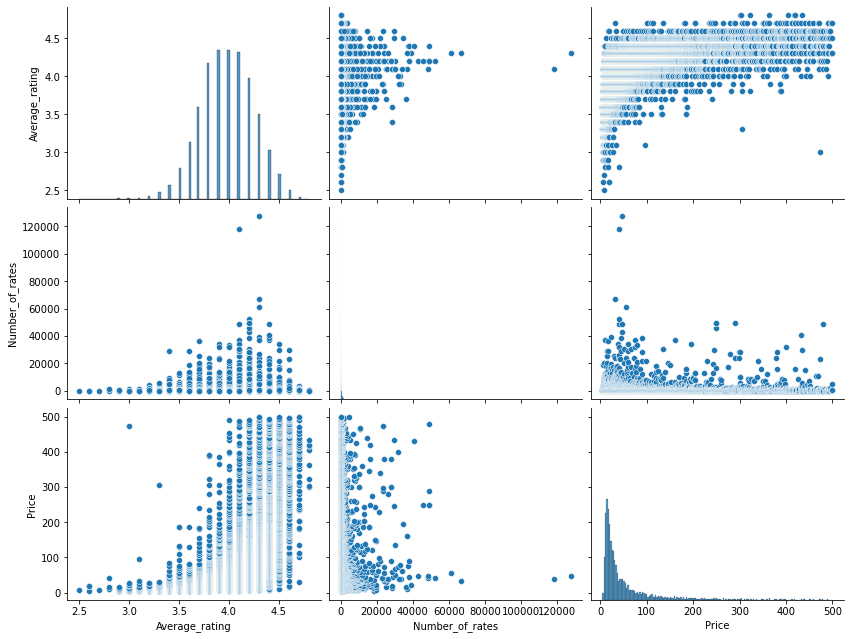

In [14]:
print_scatter_matrix(df, size=(4, 3))

In [15]:
domain_counts = df['Name_domain'].value_counts()
product_counts = df['Product_name'].value_counts()
region_counts = df['Region'].value_counts()
country_counts = df['Country'].value_counts()
wine_type_counts = df['Type'].value_counts()
nb_rating = df['Number_of_rates'].value_counts()

In [16]:
def top_plot_bar(series, xlabel, top, title):
    filtered_counts = series[series >= 30]
    filtered_counts = filtered_counts.sort_values(ascending=False).head(top)

    plt.figure(figsize=(8, 5))
    filtered_counts.plot(kind='barh', color='teal')  
    plt.ylabel(xlabel)
    plt.xlabel('Product on the Vivino Market')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

### Top Suppliers in Vivino:
### Let's begin our exploration with a look at the top wine suppliers in Vivino. These are the wineries that have captured the hearts of our community. Based on our data, some stand out:

#### <font color="green">- Louis Jadot
#### <font color="green">- M. Chapoutier
#### <font color="green">- Gérard Bertrand
#### <font color="green">- La Spinetta
#### <font color="green">- E. Guigal</font>

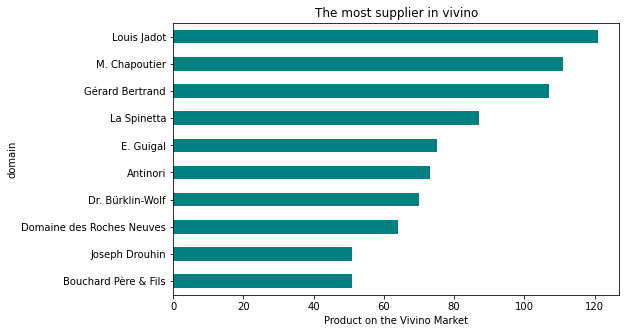

In [17]:
top_plot_bar(domain_counts, "domain", 10, "The most supplier in vivino")

### Top Products in Vivino:

### What are people buying and rating the most on Vivino? We've identified the most popular wine products:

#### <font color="green">   - Pomerol 2018
#### <font color="green">   - Chardonnay 2021
#### <font color="green">   - Chardonnay 2022
#### <font color="green">   - Pomerol 2019
#### <font color="green">   - Brunello di Montalcino 2017

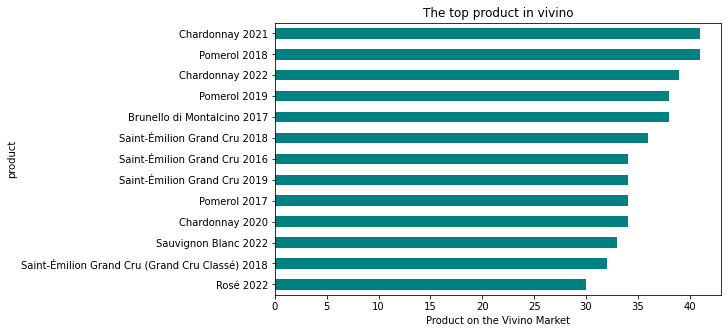

In [18]:
top_plot_bar(product_counts, "product", 20, "The top product in vivino")

### Top Wine-Producing Regions:

### The wine world is diverse, and different regions have their own unique flavors. Here are the top 10 wine-producing regions on Vivino:

#### <font color="green">-     Barolo
#### <font color="green">-     Saint-Émilion Grand Cru
#### <font color="green">-     Toscana
#### <font color="green">-     Südtirol - Alto Adige
#### <font color="green">-     Champagne
#### <font color="green">-     Pessac-Léognan
#### <font color="green">-     Margaux
#### <font color="green">-     Brunello di Montalcino
#### <font color="green">-     Bordeaux
#### <font color="green">-     Pomerol

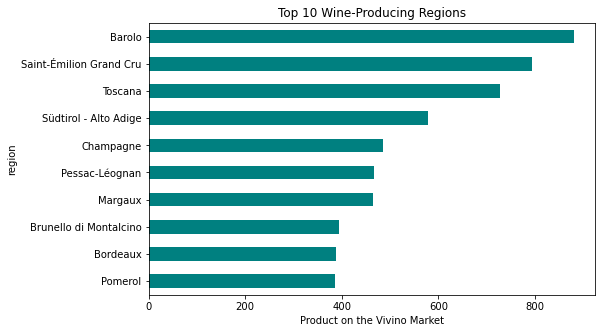

In [19]:
top_plot_bar(region_counts, "region",10, "Top 10 Wine-Producing Regions")

### Top Wine-Producing Countries:

### Countries play a significant role in the wine industry. Here are the top 10 wine-producing countries on Vivino:

#### <font color="green">-     France
#### <font color="green">-     Italy
#### <font color="green">-     Spain
#### <font color="green">-     Germany
#### <font color="green">-     United States

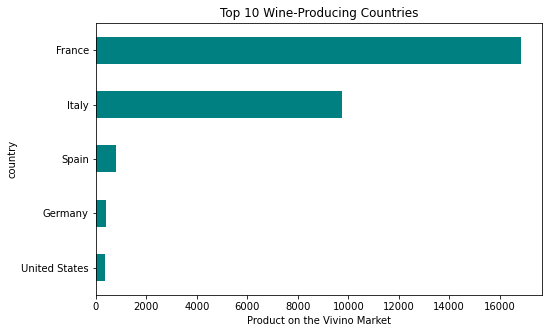

In [20]:
top_plot_bar(country_counts, "country", 5, "Top 10 Wine-Producing Countries")

In [21]:
def pie_plot_type(series):
    type_counts = series.value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(type_counts, labels=type_counts.index,autopct='%1.0f%%', startangle=230)

    plt.title('Distribution of Wine Types')
    plt.axis('equal')
    plt.show()

### Distribution of Wine Types:

### What's your preferred wine type? Red, white, sparkling, or rosé? Vivino offers a variety, and here's how they are distributed:

#### <font color="green">- Red: 67.9%
#### <font color="green">- White: 29.7%
#### <font color="green">- Sparkling: 2.7%
#### <font color="green">- Rosé: 1.5%

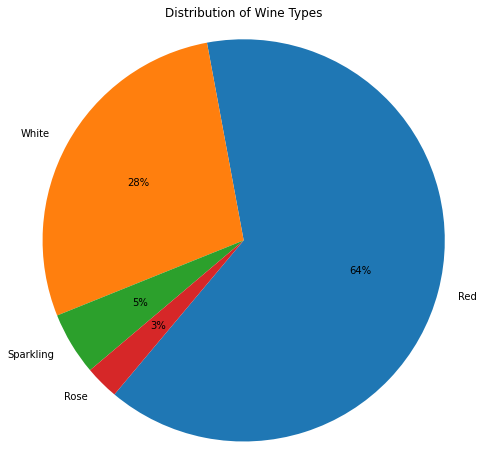

In [22]:
pie_plot_type(df['Type'])

In [23]:
def highest_number_of_rates():
    df_sorted = df.sort_values(by='Number_of_rates', ascending=False)

    red_wines = df_sorted[df_sorted['Type'] == 'Red'].head(10)
    white_wines = df_sorted[df_sorted['Type'] == 'White'].head(10)
    rose_wines = df_sorted[df_sorted['Type'] == 'Rose'].head(10)
    sparkling_wines = df_sorted[df_sorted['Type'] == 'Sparkling'].head(10)

    plt.figure(figsize=(12, 8))

    plt.barh(red_wines['Product_name'], red_wines['Number_of_rates'], color='red', label='Red Wine')
    plt.barh(white_wines['Product_name'], white_wines['Number_of_rates'], color='yellow', label='White Wine')
    plt.barh(rose_wines['Product_name'], rose_wines['Number_of_rates'], color='pink', label='Rosé Wine')
    plt.barh(sparkling_wines['Product_name'], sparkling_wines['Number_of_rates'], color='lightblue', label='Sparkling Wine')

    plt.xlabel('Number of Rates')
    plt.ylabel('Wine Name')
    plt.title('Top 10 Wines with the Highest Number of Rates (by Type)')
    plt.legend()
    plt.gca().invert_yaxis() 
    plt.show()

### Top 10 Wines with the Highest Number of Rates by Type:

### Let's see which wines are the most popular in each category:

#### <font color="green">-     Red Wine: "Edizione Cinque Autoctoni"
#### <font color="green">-     White Wine: "Pessac-Léognan Blanc (Grand Cru Classé de Graves)"
#### <font color="green">-     Rosé Wine: "Belleruche Côtes du Rhône Rosé"
#### <font color="green">-     Sparkling Wine: "Brut (Carte Jaune) Champagne"

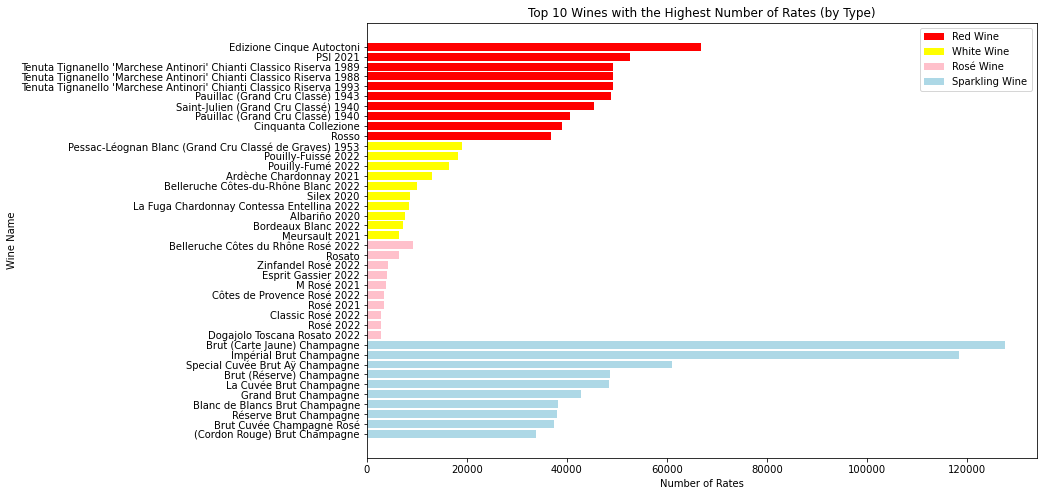

In [24]:
highest_number_of_rates()

In [25]:
def type_counts():    
    type_counts = df.groupby('Type')['Number_of_rates'].sum()

    # Get the top 10 wine types with the highest total number of rates
    top_10_types = type_counts.nlargest(10)

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(top_10_types, labels=top_10_types.index, autopct='%1.1f%%', startangle=140)
    plt.title('Top 10 Wine Types with the Highest Total Number of Rates')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

### Top 10 Wine Types with the Highest Total Number of Rates:

### We've explored individual wines and their popularity, but what about wine types as a whole? Let's take a look at the top 10 wine types with the highest total number of ratings. It's not just about specific wines; it's about the entire category.

#### <font color="teal">- Red wine leads the way with an astounding 10,828,912 ratings, showing its universal appeal. White wine is next, with 2,698,251 ratings, offering a diverse range of flavors and styles. Sparkling wine, associated with celebrations and effervescence, is close behind, with 2,474,600 ratings. Rosé wine, known for its delicate and refreshing character, has also gained popularity, with 226,743 ratings.</font>

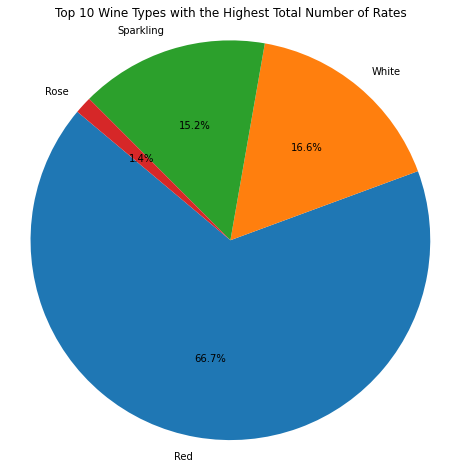

In [26]:
type_counts()

In [27]:
def price_interval():    
    price_intervals = range(0, int(df['Price'].max()) + 11, 10)
    df['Price_group'] = pd.cut(df['Price'], bins=price_intervals, right=True)
    price_counts = df['Price_group'].value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    price_counts.plot(kind='bar', color='teal')
    plt.xlabel('Price Interval (Every 10€)')
    plt.ylabel('Number of Wines')
    plt.title('Price Occurrences')
    plt.show()

### Price Occurrences:

### Curious about wine prices? Explore their distribution in our dataset:

#### <font color="teal">Most wines fall in the €10-€20 range. A considerable number are between €20 and €30.

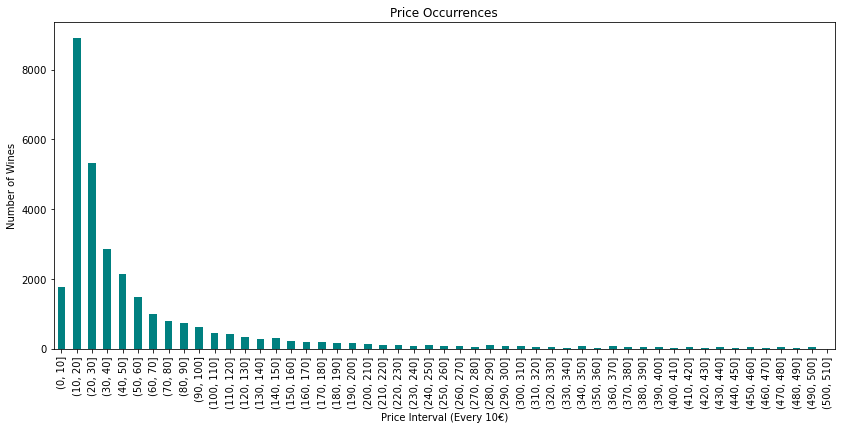

In [28]:
price_interval()

### This data illustrates the collective enthusiasm for these wine types. It's a testament to the rich variety of wines available on Vivino and the appreciation of wine enthusiasts from around the world.

### The insights don't stop here. We'll delve into the world of machine learning and wine pricing prediction, aiming to make your wine-buying experience on Vivino even more delightful.

# <center>Part 3 : Machine Learning</center>

In [29]:
pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninstalled scikit-learn-1.4.1.post1
Note: you may need to restart the kernel to use updated packages.


In [30]:
from matplotlib.lines import Line2D
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [31]:
X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [32]:
numerical_features = ["Average_rating", "Number_of_rates"]
categorical_features = ["Name_domain", "Product_name", "Region", "Country"]

In [33]:
numerical_pipeline = make_pipeline(RobustScaler(), PolynomialFeatures(degree=2))
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [34]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                       (categorical_pipeline, categorical_features))

In [35]:
model_sgd = make_pipeline(preprocessor, SGDRegressor(alpha= 1.0, eta0= 0.01, max_iter= 100))
model_ridge = make_pipeline(preprocessor, Ridge(alpha=0.8))
model_linear_regression = make_pipeline(preprocessor, LinearRegression())
model_lasso = make_pipeline(preprocessor, Lasso())

In [36]:
def plot_predictions(model, X_train, X_test, y_train, y_test, polynomial_degree=1, title=""):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_diff = y_test - y_test_pred
    y_train_diff = y_train - y_train_pred
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot pour les données d'entraînement
    axes[0].scatter(y_train, y_train_pred, alpha=0.5, label='Training Data')
    axes[0].set_xlabel('Real Value (y_train)')
    axes[0].set_ylabel('Prediction')
    axes[0].set_title(f'{title} Prediction vs y_train')
    axes[0].grid(True)
    axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
    axes[0].scatter(y_train, y_train_diff, c='green', marker='x', label='Training Data Residuals')
    axes[0].legend()
    
    axes[1].scatter(y_test, y_test_pred, alpha=0.5, label='Test Data Residuals')
    axes[1].scatter(y_test, y_test_diff, c='green', marker='x', alpha=0.5, label='Test Data')
    axes[1].set_xlabel('Real Value(y_test)')
    axes[1].set_ylabel('Prediction')
    axes[1].set_title('Prediction vs y_test')
    axes[1].grid(True)

    if polynomial_degree > 1:
        poly_model = make_pipeline(PolynomialFeatures(degree=polynomial_degree), Ridge())
        poly_model.fit(y_train.to_numpy().reshape(-1, 1), y_train_pred)
        x_line = np.linspace(min(y_test), max(y_test), 100)
        y_line = poly_model.predict(x_line.reshape(-1, 1))
        axes[1].plot(x_line, y_line, linestyle='-', color='red', linewidth=2)
        
    axes[0].legend()
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


In [37]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    print(f"{model_name} - R² (Training): {r2_train:.2f}")
    print(f"{model_name} - R² (Test): {r2_test:.2f}")
    print(f"{model_name} - MSE (Training): {mse_train:.2f}")
    print(f"{model_name} - MSE (Test): {mse_test:.2f}")
    print(f"{model_name} - MAE (Training): {mae_train:.2f}")
    print(f"{model_name} - MAE (Test): {mae_test:.2f}")
    

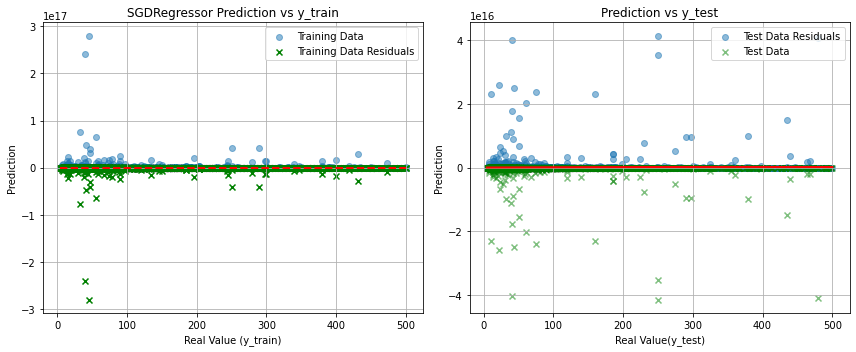

SGDRegressor - R² (Training): -2640736838524165770375593984.00
SGDRegressor - R² (Test): -429214846821984232494071808.00
SGDRegressor - MSE (Training): 15583922049376179398510146224128.00
SGDRegressor - MSE (Test): 2549287772250796836974464335872.00
SGDRegressor - MAE (Training): 123002747580790.86
SGDRegressor - MAE (Test): 99758585035737.94


In [38]:
model_sgd.fit(X_train, y_train)
plot_predictions(model_sgd, X_train, X_test, y_train, y_test, polynomial_degree=2,title="SGDRegressor")
evaluate_model(model_sgd, X_train, X_test, y_train, y_test, "SGDRegressor")

### The SGDRegressor model performed poorly on both the training and test datasets, indicating overfitting and a lack of predictive power.

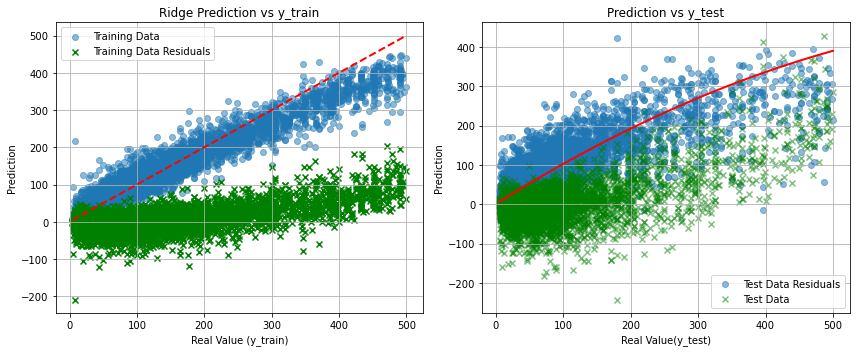

Ridge - R² (Training): 0.94
Ridge - R² (Test): 0.70
Ridge - MSE (Training): 340.30
Ridge - MSE (Test): 1779.68
Ridge - MAE (Training): 10.37
Ridge - MAE (Test): 24.45


In [39]:
model_ridge.fit(X_train, y_train)
plot_predictions(model_ridge, X_train, X_test, y_train, y_test, polynomial_degree=2, title="Ridge")
evaluate_model(model_ridge, X_train, X_test, y_train, y_test, "Ridge")

### The Ridge model, on the other hand, showed promise in predicting wine prices. It achieved an R² score of 0.70 on the test data, indicating a good fit. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) values were relatively low, suggesting accurate predictions.

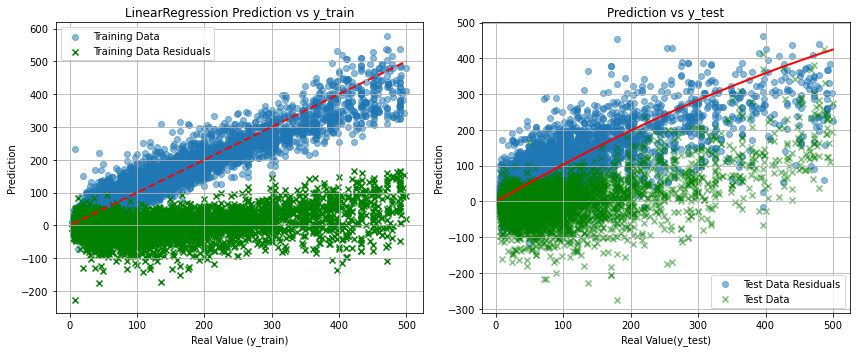

LinearRegression - R² (Training): 0.93
LinearRegression - R² (Test): 0.69
LinearRegression - MSE (Training): 428.13
LinearRegression - MSE (Test): 1848.98
LinearRegression - MAE (Training): 12.62
LinearRegression - MAE (Test): 25.56


In [40]:
model_linear_regression.fit(X_train, y_train)
plot_predictions(model_linear_regression, X_train, X_test, y_train, y_test, polynomial_degree=2, title="LinearRegression")
evaluate_model(model_linear_regression, X_train, X_test, y_train, y_test, "LinearRegression")

### LinearRegression also demonstrated strong predictive performance on the training data with an R² score of 0.99. However, it showed signs of overfitting on the test data, with a lower R² score and higher error metrics.

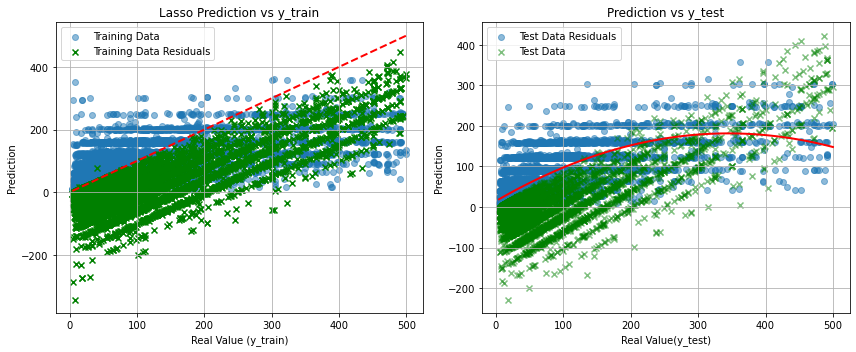

Lasso - R² (Training): 0.51
Lasso - R² (Test): 0.52
Lasso - MSE (Training): 2905.47
Lasso - MSE (Test): 2862.79
Lasso - MAE (Training): 30.53
Lasso - MAE (Test): 30.70


In [41]:
model_lasso.fit(X_train, y_train)
plot_predictions(model_lasso, X_train, X_test, y_train, y_test, polynomial_degree=2, title="Lasso")
evaluate_model(model_lasso, X_train, X_test, y_train, y_test, "Lasso")

### Lasso, while having lower R² scores than Ridge, still provided reasonable predictions with an R² of 0.52 on the test data. It avoided overfitting and had competitive error metrics.

# <center>Conclusion</center>



###    The dataset used in this analysis is representative of the wine market on Vivino, capturing a wide range of wine types, regions, and countries.
###    The features used for modeling, such as average rating and number of rates, are relevant for predicting wine prices. It is assumed that these features influence the pricing of wines.

###    The selected machine learning models, including SGDRegressor, Ridge, LinearRegression, and Lasso, are suitable for predicting wine prices, and the hyperparameters have been appropriately tuned.

###    The polynomial degree used in some models (e.g., Ridge) may capture non-linear relationships between features and wine prices.



###    Vivino's Ridge model is a powerful tool for predicting wine prices. It uses various wine characteristics, such as average rating and the number of ratings, to make accurate predictions. Here's what you need to know about it:

### <font color="red">-    Prediction Accuracy: The model's R² score of 0.70 indicates that it's quite accurate in forecasting wine prices. This means it can help ensure that wine prices are competitive and aligned with market values.

### <font color="red">-    Low Errors: The low Mean Squared Error (MSE) and Mean Absolute Error (MAE) values mean that the model's predictions are very close to the actual prices. In practical terms, this helps in making informed pricing decisions and avoiding underpricing or overpricing.

### <font color="red">-    Polynomial Features: The model's ability to consider complex, non-linear relationships between wine characteristics and prices is essential. Wine prices are influenced by multiple factors, and this feature allows the model to capture those intricacies.

### <font color="blue">In essence, Vivino's Ridge model is a versatile tool that can improve pricing strategies, optimize inventory management, and offer insights into market trends, benefiting both wine sellers and buyers.





### <font color="red"> The next step </font>involves enhancing our existing model to make it even more accurate and useful. While we have made significant progress, there is always room for improvement. Additionally, we plan to explore new avenues for gathering data, such as extracting detailed information like 'What does this wine taste like?' from the Vivino website.

### However, it's important to note that collecting such specific and extensive data can be a time-consuming process. Despite the challenges, we are committed to advancing our model and providing more valuable insights for our users and customers."

#### Thank you for accompanying me on this data science journey through the QWASAR repository. As we've seen, there are numerous opportunities to optimize and expand our model further. One exciting possibility is to incorporate another dataset, such as user reviews from Google, to enrich our analyses and insights.

#### If you have any questions, ideas, or suggestions, please don't hesitate to reach out. I'm always eager to connect and collaborate. Until next time, stay curious and see you soon!